# CS170A -- HW#0 -- Solution form -- Matlab

Your name:  Alfred Lucero
Your UID: 604251044

<b>Please upload only this notebook to CCLE by the deadline.</b>

<b>Policy for late submission of solutions:</b>  We will use Paul Eggert's Late
Policy: $N$ days late $\Leftrightarrow$ $2^N$ points deducted}
The number of days late is $N=0$
for the first 24 hrs, $N=1$ for the next 24 hrs, etc., and if you submit
an assignment $H$ hours late, $2^{\lfloor H/24\rfloor}$ points are
deducted.

## Problem 1:  Images (30 points)

<b>(a) color-to-grayscale transformation:</b>
<br/>
include both your function <tt>grayscale(A)</tt>
and its result where <tt>A</tt> the RGB Mandrill image.

In [6]:
load mandrill

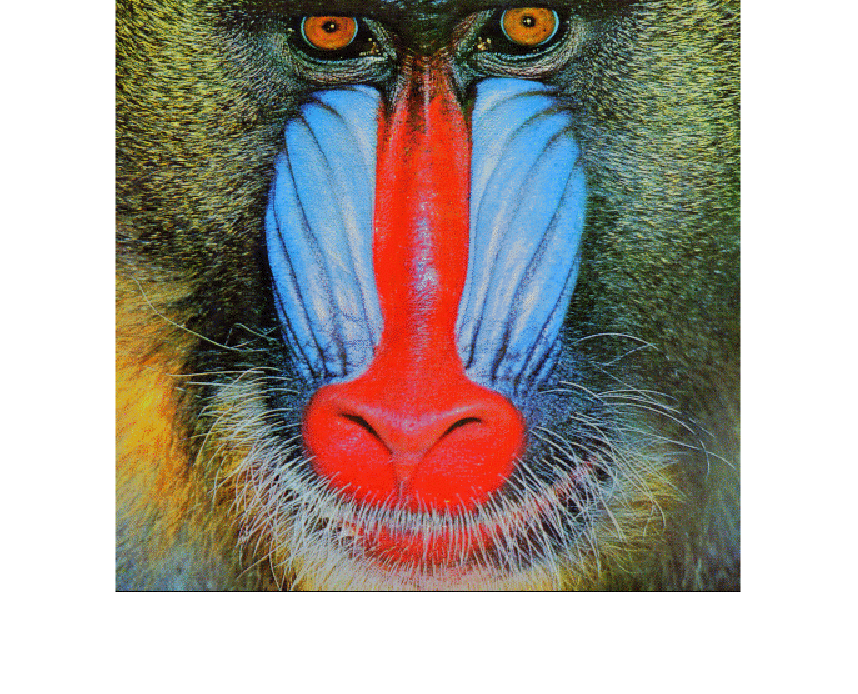

image2rgb =

  function_handle with value:

    @(A)deal(double(A(:,:,1)),double(A(:,:,2)),double(A(:,:,3)))


rgb2image =

  function_handle with value:

    @(R,G,B)cat(3,uint8(R),uint8(G),uint8(B))


ans =

   480   500     3


In [7]:
% Helper functions to convert from image to rgb and vice versa
image2rgb = @(A) deal(double(A(:,:,1)),  double(A(:,:,2)),  double(A(:,:,3)))
rgb2image = @(R,G,B) cat(3, uint8(R), uint8(G), uint8(B))
map = uint8( map * 256 ); % Multiply by 256 to fix number values
Mandrill = ind2rgb( X, map ); % Convert to an RGB image
size(Mandrill)
[R, G, B] = image2rgb(Mandrill);
exampleHelperImage = rgb2image(R,G,B);
imshow(exampleHelperImage)

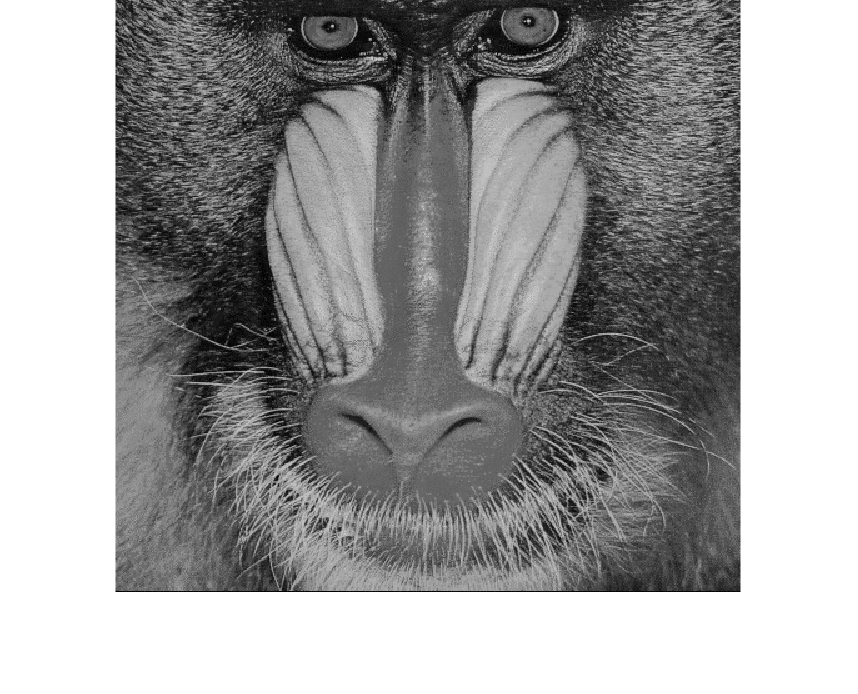

In [10]:
% grayscale = @(A) ...
% function grayscale = convert2grayscale(A)
% [R,G,B] = image2rgb(A);
% grayscale = rgb2image((R+G+B)/3, (R+G+B)/3, (R+G+B)/3);
% end
% imshow( grayscale(Mandrill) )
% Defining functions over multiple lines won't work in Matlab Jupyter Notebook
% Error occurs: Function definitions are not permitted in this context.
grayscale = @(A) uint8(cat(3, mean(A,3), mean(A,3), mean(A,3)));

imshow( grayscale(Mandrill) )





<b>(b) image saturation and oversaturation:</b>
<br/>
include both your function <tt>saturate(A,t)</tt>
and its result where <tt>A</tt> the RGB Mandrill image, when t=0.25.


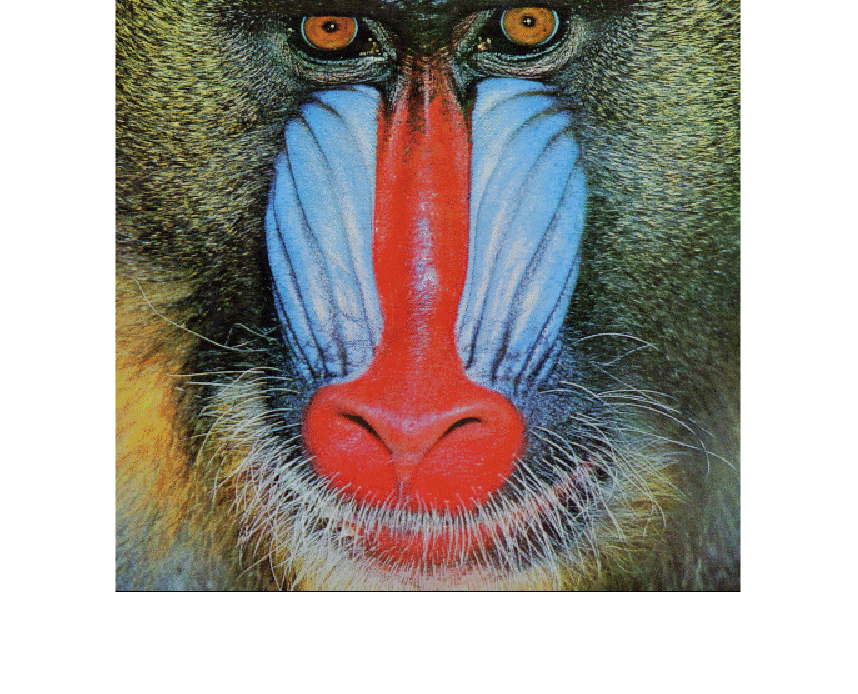

In [26]:
% saturate  =  @(A,t)  ...
% function saturate = convert2saturated(A, t)
% B = grayscale(A);
% saturate = interpolate(A, B, t)
% end
% imshow( saturate(Mandrill, t) )

saturate = @(A,t) uint8(0.75*A + 0.25*double(grayscale(A)));

% Using saturate 0.25
%[R, G, B] = image2rgb(Mandrill);
%[X, Y, Z] = image2rgb(grayscale);

%saturate = rgb2image ((0.75).*R + (0.25).*X, (0.75).*G + (0.25).*Y, (0.75).*B + (0.25).*Z);

imshow( saturate(Mandrill, 0.25) )



<b>(c) image brightening:</b>
<br/>
include both your function <tt>brighten(A,t)</tt>
and its result where <tt>A</tt> the RGB Mandrill image, when t=0.25.

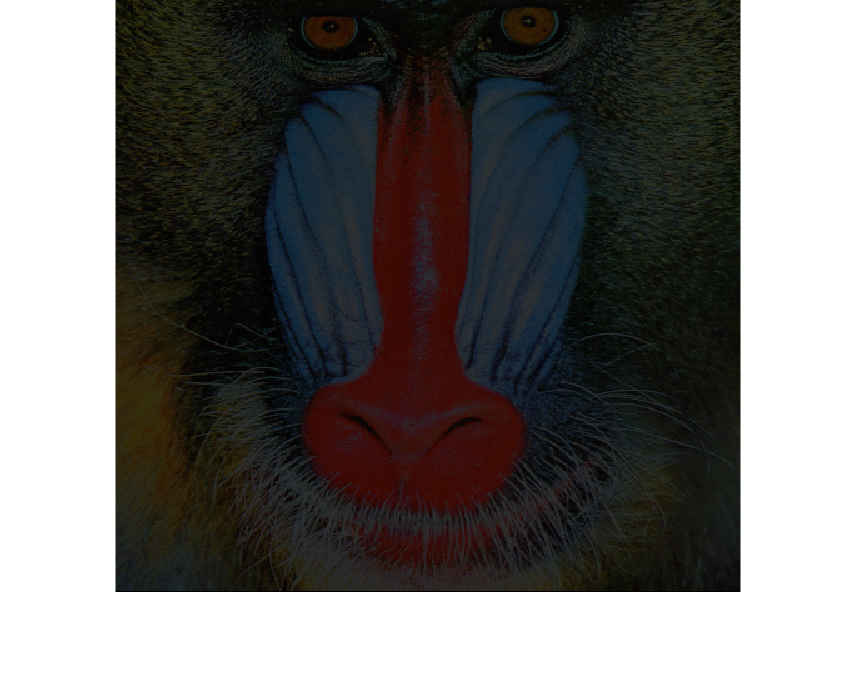

In [17]:
% brighten  =  @(A,t)  ...
% function brighten = convert2brightened(A,t)
% [R,G,B] = image2rgb(Mandrill);
% brighten = rgb2image(R*t, G*t, B*t);
% end
% imshow( brighten(Mandrill, t) )

brighten = @(A,t) uint8(A*t);

% Using brightness t = 0.25
%[R,G,B] = image2rgb(Mandrill);
%brighten = rgb2image(R*0.25, G*0.25, B*0.25);
imshow(brighten(Mandrill, 0.25))


## Problem 2: Color Models  (30 points)

<b>(a) RGB to YCbCr(R,G,B):</b>
<br/>
Prove that the result of <tt>RGB to YCbCr(R,G,B)</tt>
are all in the range 0 t 255, provided R, G, and B are.

In [66]:
% Provided R, G, B are in the range 0 to 255, the input Rval, Gval, and Bval will first
% be converted to double values and multiplied by 255 if the max value out of all matrix values is <= 1
% Then, after the Y, Cb, and Cr values are computed from the R, G, B through matrix transformations,
% The Y_uint8 = uint8( Y ); Cb_uint8 = uint8( Cb ); Cr_uint8 = uint8 ( Cr ); involve conversions to
% unsigned 8-bit integers whose values fall from 0 to 255.
% Example code in following formula:
MAXJSAMPLE = 255;
CENTERJSAMPLE = 128;

Ry = double(R);
Gy = double(G);
By = double(B);
if (max(max([Ry Gy By])) <= 1.0)
    Ry = Ry * MAXJSAMPLE;
    Gy = Gy * MAXJSAMPLE;
    By = By * MAXJSAMPLE;
end;

Y = 0.29900 * Ry + 0.58700 * Gy + 0.11400 * By;
Cb = -0.16874 * Ry - 0.33126 * Gy + 0.50000 * By + CENTERJSAMPLE;
Cr = 0.50000 * Ry - 0.41869 * Gy + 0.08131 * By + CENTERJSAMPLE;

Y_uint8 = uint8( Y );
Cb_uint8 = uint8( Cb );
Cr_uint8 = uint8( Cr );

% Max values using Mandrill R,G,B (range is from 0 to 255)
max(max(Y_uint8))
max(max(Cb_uint8))
max(max(Cr_uint8))
% Min values using Mandril R,G,B (range is from 0 to 255)
min(min(Y_uint8))
min(min(Cb_uint8))
min(min(Cr_uint8))

ans =

  uint8

   203


ans =

  uint8

   184


ans =

  uint8

   238


ans =

  uint8

   0


ans =

  uint8

   50


ans =

  uint8

   102


<b>(b) RGB to CMY(R,G,B):</b>
<br/>
Develop a similar kind of function <tt>RGB_to_CMY(R,G,B)</tt>
for converting RGB to CMY values.

In [67]:
% RGB values from 0 to 255
% CMY results from 0 to 1
% Follows Cyan = 1 - ( Red / 255 )
% Follows Magenta = 1 - ( Green / 255 )
% Follows Yellow = 1 - ( Blue / 255 )
RGB_to_CMY = @(R, G, B) cat(3, double(1 - double(R / 255)), double(1 - double(G / 255)), double(1 - double(B / 255)))

RGB_to_CMY =

  function_handle with value:

    @(R,G,B)cat(3,double(1-double(R/255)),double(1-double(G/255)),double(1-double(B/255)))


<b>(c) CMY Mandrill:</b>
<br/>
Show your result of <tt>RGB_to_CMY()</tt> for the Mandrill image by rendering it in RGB.
(Please display the image in RGB -- with Cyan as Red, Magenta as Green, Yellow as Blue.)

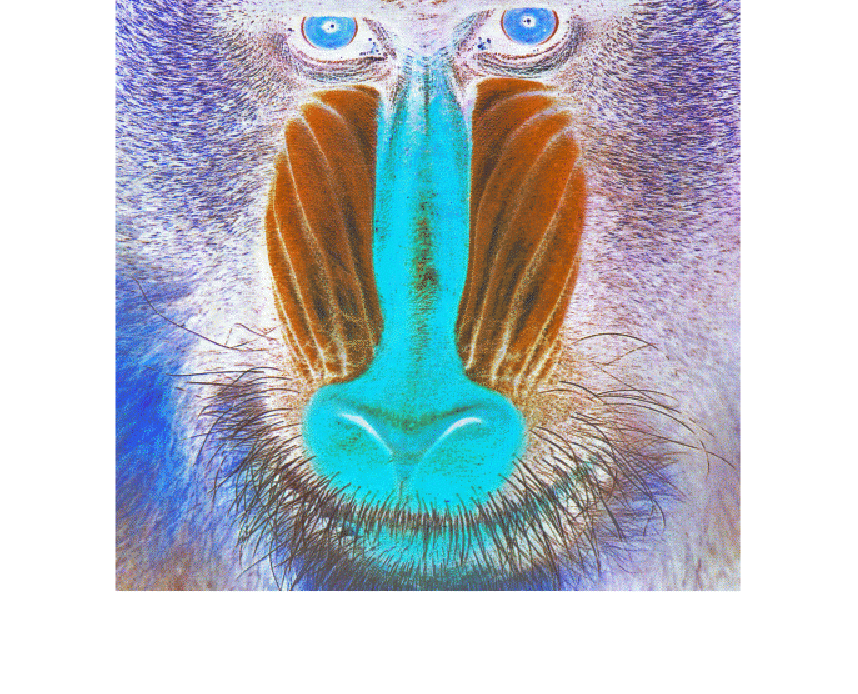

In [68]:
% Convert Mandrill image to Cyan, Magenta, Yellow color values
imshow(RGB_to_CMY(R,G,B))

## Problem 3: Rotations  (20 points)

The file <tt>rotations_and_reflections.m</tt> produces some 2x2 matrices,
and shows how to define symbolic variables like $\theta$.
Using symbolic values, find a 3x3 matrix for $R_{123}(\psi,\theta,\phi)$.
(Hint: blkdiag might help.)

In [69]:
% Create EulerAngleRotation from psi, theta, phi inputs
EulerAngleRotation = @(psi, theta, phi) blkdiag(Rotation(psi), 1) * blkdiag(1, Rotation(theta)) *blkdiag(Rotation(phi), 1)

% Define symbolic theta, phi, psi
theta = sym('theta')
phi = sym('phi')
psi = sym('psi')

Rotation = @(t) [ cos(t) -sin(t) ; sin(t) cos(t) ]   %  define a function that returns a rotation matrix

% Euler Angle Rotation Check if parts follow correct form
blkdiag(Rotation(psi), 1)
blkdiag(1, Rotation(theta))
blkdiag(Rotation(phi), 1)

% Create EulerAngleRotation from psi, theta, phi inputs
EulerAngleRotation = @(psi, theta, phi) blkdiag(Rotation(psi), 1) * blkdiag(1, Rotation(theta)) *blkdiag(Rotation(phi), 1)
EulerAngleRotation(90,0,90)

EulerAngleRotation =

  function_handle with value:

    @(psi,theta,phi)blkdiag(Rotation(psi),1)*blkdiag(1,Rotation(theta))*blkdiag(Rotation(phi),1)

 
theta =
 
theta
 
 
phi =
 
phi
 
 
psi =
 
psi
 

Rotation =

  function_handle with value:

    @(t)[cos(t),-sin(t);sin(t),cos(t)]

 
ans =
 
[ cos(psi), -sin(psi), 0]
[ sin(psi),  cos(psi), 0]
[        0,         0, 1]
 
 
ans =
 
[ 1,          0,           0]
[ 0, cos(theta), -sin(theta)]
[ 0, sin(theta),  cos(theta)]
 
 
ans =
 
[ cos(phi), -sin(phi), 0]
[ sin(phi),  cos(phi), 0]
[        0,         0, 1]
 

EulerAngleRotation =

  function_handle with value:

    @(psi,theta,phi)blkdiag(Rotation(psi),1)*blkdiag(1,Rotation(theta))*blkdiag(Rotation(phi),1)


ans =

   -0.5985    0.8012         0
   -0.8012   -0.5985         0
         0         0    1.0000


## Problem 4: Slices  (20 points)

<b>(a) Global Average Temperature Anomaly:</b>
<br/>
plot the average (non-missing-value) temperature anomaly over the entire grid,
for every year from 1916 to 2015.

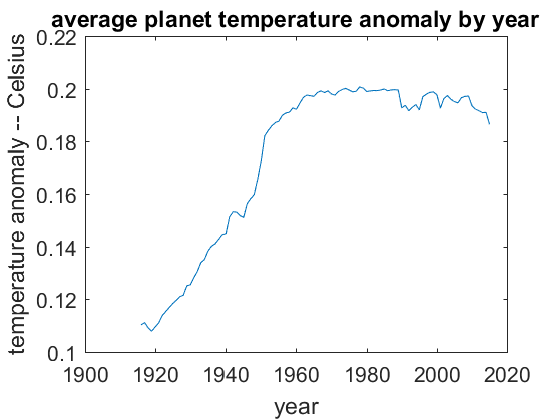

In [2]:
% Make sure .csv file is in same folder as notebook solution
GHCN = csvread('ghcn.csv');

%   The data was artificially shifted to [0, 4500];
%     its range should be [-2500, +2000]/100 = [-25,+20], in degrees Centigrade.
%     Since our focus here is on warming, we ignore temperatures below -5.
%   We omit the year and month in columns 1:2 before scaling:

GHCN_in_centigrade  = (GHCN(:,3:74) - 2500) / 100;


temperature_anomaly = reshape( GHCN_in_centigrade, [36, 12, 137, 72] );   % convert to a 4D matrix, so we can use slices
number_of_all_GHCN_values = prod(size( temperature_anomaly ));


missing_values = (temperature_anomaly == -25);
% Get the non_missing_values of the temperature anomalies
non_missing_values = ~(missing_values);

my_years = 1916:2015;
planet_latitude = 1:36;
planet_longitude = 1:72;
% Change to entire planet so 1:36 for latitude and 1:72 for latitude
my_slice = non_missing_values( planet_latitude, :, my_years - 1880 + 1, planet_longitude );

% Change to 36 latitude * 72 Longitude * 12 months
total_number_of_grid_squares = length(planet_latitude) * length(planet_longitude) * 12;
N = total_number_of_grid_squares;

average_whole_planet_by_year = reshape( sum(sum(sum( my_slice, 4),2),1), [length(my_years) 1] ) / N;


plot( my_years, average_whole_planet_by_year )
xlabel('year')
ylabel('temperature anomaly -- Celsius')
title('average planet temperature anomaly by year')



<b>(b) Global Warming:</b>
<br/>
Based on your plot, give your opinion on this question: is `global warming' real?

In [71]:
% Since we are evaluating in the last 100 years for the entire planet's average temperature anomalies by year
% and based on the positive upward trend of the plot showing around 0.1 degrees Celsius increase from 1905 to 2016, we can
% see that 'global warming' is real as the temperature anomalies increased from around 0.1 to around 0.2 degrees Celsius.
% The earth's global population's over-reliance on fossil fuels lead to the release of greenhouse gases in the form of CO2 that
% affect climate regulation and spark further processes of the greenhouse effect, warming the earth over the years.